In [1]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
%matplotlib inline
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [47]:
#第一题
#数据处理，先把前50找出来
E_data =  pd.read_csv('usgs_earthquakes.csv')
E_data
E_data2=E_data.sort_values("mag", ascending=False)
E_data2
E_data3=E_data2.head(50)
E_data3


,longitude,latitude,mag
37371,-70.7691,-19.6097,8.2
50562,178.7352,51.8486,7.9
36918,-70.4931,-20.5709,7.7
33808,162.1481,-11.2701,7.6
31496,155.0241,-6.7547,7.5
33537,162.0511,-11.4633,7.4
95913,-88.1225,12.5262,7.3
31850,-100.9723,17.3970,7.2
34318,155.0485,-6.5858,7.1
106285,126.5217,1.8929,7.1


Text(0, 0.5, 'latitude')

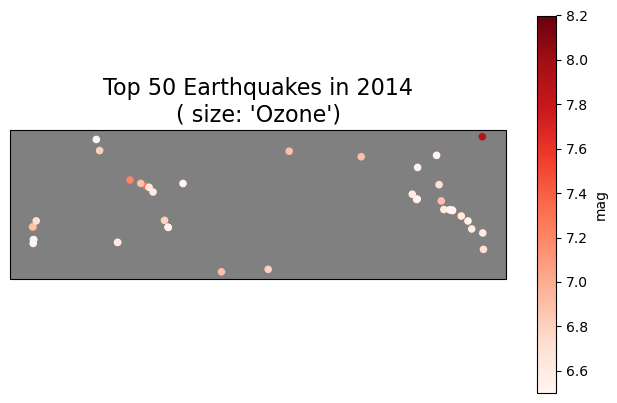

In [111]:
#这部分的地图单独可以画
plt.figure(figsize=(8,5), dpi=100)
proj = ccrs.Robinson() 
ax1 = plt.axes(projection=proj)

# Add natural features to axes using cartopy.feature (cfeature)
ax1.add_feature(cfeature.OCEAN, zorder=0)
ax1.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)

#这部分的点图改改格式也可以单独画
E_data3.plot.scatter('longitude','latitude',c='mag',
                cmap='Reds',ax=ax1, transform=ccrs.Robinson())
plt.title("Top 50 Earthquakes in 2014\n( size: 'Ozone')", 
          fontsize=16)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)

#但一放到一块，地图就被遮没了,X和Y轴也被吃了

In [114]:
#第二题
ds = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")
ds
#随便选个时间点
tem = ds.tas.isel(time=10)
tem

<xarray.DataArray 'tas' (lat: 192, lon: 288)>
array([[236.34064, 236.34064, 236.34064, ..., 236.34064, 236.34064, 236.34064],
       [237.29276, 237.24954, 237.09113, ..., 237.33508, 237.32607, 237.31099],
       [238.06989, 238.01465, 237.98006, ..., 238.33641, 238.27374, 238.19115],
       ...,
       [253.08813, 253.1251 , 253.15596, ..., 252.99036, 253.02151, 253.05057],
       [252.32394, 252.33342, 252.34363, ..., 252.2867 , 252.30075, 252.3131 ],
       [251.91856, 251.91977, 251.92087, ..., 251.91415, 251.91577, 251.91724]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time     object 2000-11-15 00:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    mipTable:       Amon
    out_name:       tas
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  air_temperature
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(50, 0, 'Text1 ')

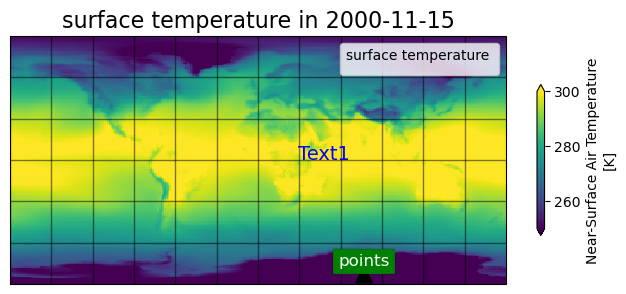

In [133]:
plt.figure(figsize=(8,5), dpi=100)
proj = ccrs.PlateCarree()
ax2 = plt.axes(projection=proj)
tem.plot(ax=ax2, transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})
plt.title("surface temperature in 2000-11-15", 
          fontsize=16)        
#明明画了，但x和y轴还是会被吃掉，莫名其妙，地图真的可以画x和Y轴么？
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)

#没有需要标注的内容，只能单纯加个标签
plt.legend( title='surface temperature ')
plt.annotate('points', xy=(77, -77), xytext=(77, -77),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
plt.text(50, 0, "Text1 ", transform=plt.gca().transData, 
         fontsize=14, ha='center', color='blue')
#网格线
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


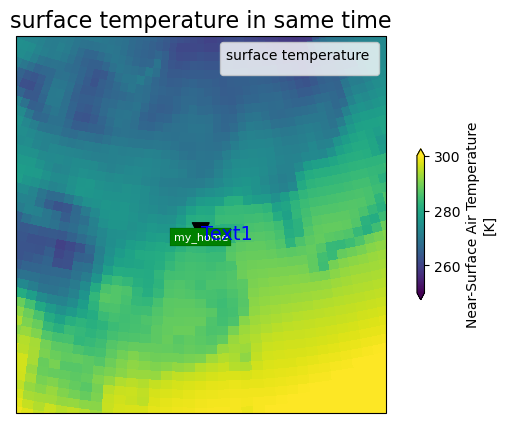

In [152]:
plt.figure(figsize=(8,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 116.20,36.15 # 以我家为核心，大致画了大半个中国和一部分邻国
proj = ccrs.Orthographic(central_lon, central_lat) 

ax3 = plt.axes(projection=proj)
extent = [central_lon-20, central_lon+20, central_lat-20, central_lat+20]
ax3.set_extent(extent)
tem.plot(ax=ax3, transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})
plt.title("surface temperature in same time", 
          fontsize=16)
#明明画了，但x和y轴还是会被吃掉，莫名其妙，地图真的可以画x和Y轴么？
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)

#没有需要标注的内容，只能单纯加个标签
plt.legend( title='surface temperature ')
plt.annotate('my_home', xy=(116.2, 36.15), xytext=(116.2, 36.15),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=8, color='white', horizontalalignment='center')
plt.text(114.15, 22.25, "Text1 ", transform=plt.gca().transData, 
         fontsize=14, color='blue')
#网格线
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.ylocator = mticker.FixedLocator(np.arange(16.15,56.15,10))
gl.xlocator = mticker.FixedLocator(np.arange(96.2, 136.2, 10))